In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf

### Loading the image dataset

In [8]:
!pip install -q kaggle

In [9]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset
License(s): other
 95% 752M/788M [00:03<00:00, 231MB/s]
100% 788M/788M [00:03<00:00, 263MB/s]


In [11]:
!unzip microsoft-catsvsdogs-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  

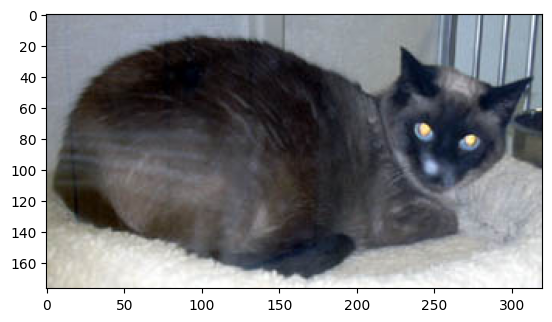

In [12]:
img = Image.open('/content/PetImages/Cat/10005.jpg')
plt.imshow(img)

### processing the images

In [15]:
import os
import shutil

#source directory
cat_dir = "/content/PetImages/Cat"
dog_dir = "/content/PetImages/Dog"

#destination directory
dest_dir = "/content/combined_dataset"

#function to create single directory
def copy_images(src_dir, prefix):
    for idx, filename in enumerate(os.listdir(src_dir)):
      src_path = os.path.join(src_dir, filename)
      dest_path = os.path.join(dest_dir, f"{prefix}_{idx}.jpg")
      shutil.copyfile(src_path, dest_path)

copy_images(cat_dir, "cat")
copy_images(dog_dir, "dog")

In [19]:
folder_path = '/content/augmented_dataset'

# Count image files
image_count = len([f for f in os.listdir(folder_path)])

print(f"Number of images: {image_count}")

Number of images: 2000


In [44]:
src_dir = "/content/combined_dataset/"
dest_dir = "/content/augmented2_dataset/"

# Make sure destination folder exists
os.makedirs(dest_dir, exist_ok=True)

for i in range(2000):
    filename = os.listdir(src_dir)[i]
    src_path = os.path.join(src_dir, filename)

    img = Image.open(src_path)
    resized_img = img.resize((224, 224))
    grayscale_img = resized_img.convert("RGB")  # Convert resized image to grayscale

    dest_path = os.path.join(dest_dir, filename)
    grayscale_img.save(dest_path)


In [45]:
#check no. of cat and dog
cat_c = 0
dog_c = 0

for filename in os.listdir("/content/augmented2_dataset"):
  name = filename[0:3]
  if name == "cat":
    cat_c+=1
  else:
    dog_c+=1

print(f"Number of cats: {cat_c}")
print(f"Number of dogs: {dog_c}")

Number of cats: 1002
Number of dogs: 998


In [46]:
filename = os.listdir("/content/augmented2_dataset")
print(filename)

['dog_1173.jpg', 'cat_1570.jpg', 'dog_5253.jpg', 'cat_6254.jpg', 'dog_6330.jpg', 'dog_11028.jpg', 'dog_1667.jpg', 'dog_3391.jpg', 'cat_7962.jpg', 'dog_10741.jpg', 'dog_4864.jpg', 'dog_2177.jpg', 'cat_928.jpg', 'cat_6644.jpg', 'cat_11576.jpg', 'cat_8280.jpg', 'cat_10997.jpg', 'cat_7976.jpg', 'dog_4744.jpg', 'dog_7002.jpg', 'dog_9206.jpg', 'cat_4638.jpg', 'dog_7189.jpg', 'dog_8458.jpg', 'cat_2537.jpg', 'dog_11305.jpg', 'dog_8872.jpg', 'dog_10130.jpg', 'cat_2123.jpg', 'dog_1195.jpg', 'dog_42.jpg', 'cat_1290.jpg', 'dog_1809.jpg', 'dog_7512.jpg', 'dog_2453.jpg', 'dog_11483.jpg', 'dog_10873.jpg', 'dog_12073.jpg', 'dog_2727.jpg', 'cat_7272.jpg', 'cat_6289.jpg', 'dog_10124.jpg', 'dog_9769.jpg', 'dog_9091.jpg', 'dog_3943.jpg', 'cat_2634.jpg', 'cat_1477.jpg', 'cat_8412.jpg', 'cat_8992.jpg', 'cat_1925.jpg', 'dog_9503.jpg', 'cat_10998.jpg', 'cat_11696.jpg', 'dog_468.jpg', 'dog_6460.jpg', 'dog_473.jpg', 'dog_11447.jpg', 'cat_9897.jpg', 'cat_6608.jpg', 'cat_6711.jpg', 'dog_5423.jpg', 'dog_3119.jpg',

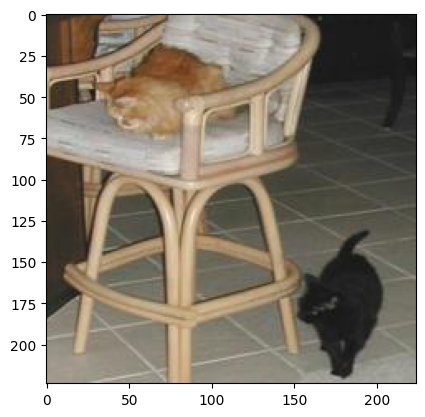

In [47]:
img = Image.open('/content/augmented2_dataset/cat_1570.jpg')
plt.imshow(img)

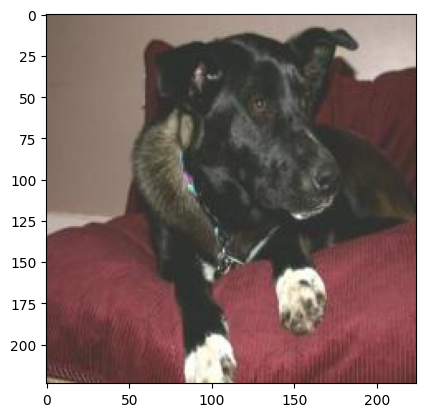

In [49]:
img = Image.open('/content/augmented2_dataset/dog_1173.jpg')
plt.imshow(img)

In [50]:
#label of dog and cat
labels = []
for filename in os.listdir("/content/augmented2_dataset"):
  name = filename[0:3]
  if name == "cat":
    labels.append(0)
  else:
    labels.append(1)

print(labels[0:5])

[1, 0, 1, 0, 1]


In [51]:
#creating array of images
src_dir = "/content/augmented2_dataset"

#array of images
img_arrays = []

for filename in os.listdir(src_dir):
    src_path = os.path.join(src_dir, filename)
    img = Image.open(src_path)
    img_array = np.array(img) / 255.0  #Normalize to [0,1]
    img_arrays.append(img_array)

img_arrays = np.array(img_arrays)
print(img_arrays.shape)

(2000, 224, 224, 3)


### spliting the dataset

In [52]:
X = img_arrays
y = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 224, 224, 3)
(400, 224, 224, 3)
(1600,)
(400,)


In [54]:
X_train[0]

array([[[0.58823529, 0.61960784, 0.63137255],
        [0.6       , 0.63137255, 0.64313725],
        [0.60784314, 0.63921569, 0.65098039],
        ...,
        [0.44313725, 0.49803922, 0.43137255],
        [0.43921569, 0.49411765, 0.42745098],
        [0.44313725, 0.49803922, 0.43137255]],

       [[0.59215686, 0.62352941, 0.63529412],
        [0.60392157, 0.63529412, 0.64705882],
        [0.61176471, 0.64313725, 0.65490196],
        ...,
        [0.45490196, 0.50980392, 0.44313725],
        [0.45490196, 0.50980392, 0.44313725],
        [0.45490196, 0.50980392, 0.44313725]],

       [[0.59215686, 0.62352941, 0.63529412],
        [0.6       , 0.63137255, 0.64313725],
        [0.61176471, 0.64313725, 0.65490196],
        ...,
        [0.48627451, 0.54117647, 0.48235294],
        [0.48627451, 0.54117647, 0.48235294],
        [0.48235294, 0.5372549 , 0.47843137]],

       ...,

       [[0.92156863, 0.8745098 , 0.91372549],
        [0.91372549, 0.87058824, 0.90196078],
        [0.75686275, 0

### Building the neural network using CNN

In [55]:
import tensorflow as tf
import tensorflow_hub as hub

In [31]:
mobilenet_model = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-feature-vector/4"

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224), trainable=False)

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │    11,944,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,963,457 (45.64 MB)

 Trainable params: 11,963,457 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(
    optimizer="adam",
    loss= "binary_crossentropy",
    metrics=["accuracy"]
)

In [58]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.5139 - loss: 1.1443
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6379 - loss: 0.6697
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7408 - loss: 0.5369
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8798 - loss: 0.3302
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9376 - loss: 0.1899
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9728 - loss: 0.1080
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9967 - loss: 0.0302
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9997 - loss: 0.0121
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 1.0000 - loss: 0.0058
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 1.0000 - loss: 0.0022


In [59]:
model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.6309 - loss: 2.0787


[2.0834810733795166, 0.625]

### Building the neural network using transfer learning(mobilenetV2)

In [65]:
import tensorflow as tf

In [67]:
mobile_net = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224, 224, 3),
                                                            include_top=False,
                                                            weights='imagenet')
mobile_net.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [69]:
model = tf.keras.Sequential([
    mobile_net,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [70]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8291 - loss: 0.4045
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9647 - loss: 0.1088
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9768 - loss: 0.0793
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9810 - loss: 0.0630
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9880 - loss: 0.0532
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9843 - loss: 0.0581
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9873 - loss: 0.0495
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9911 - loss: 0.0380
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9913 - loss: 0.0384
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9895 - loss: 0.0323


In [71]:
model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 294ms/step - accuracy: 0.9669 - loss: 0.0638


[0.06776048988103867, 0.9649999737739563]

In [74]:
y_predicted = model.predict(X_test)
y_class = [1 if i > 0.5 else 0 for i in y_predicted]

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [78]:
y_class[0:10]

[1, 1, 0, 0, 0, 0, 0, 1, 1, 1]

In [77]:
y_test[0:10]

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

### save the model

In [80]:
model.save('classifier_model.h5')

In [100]:
classifier_model = tf.keras.models.load_model('classifier_model.h5')

### prediction program implementation

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

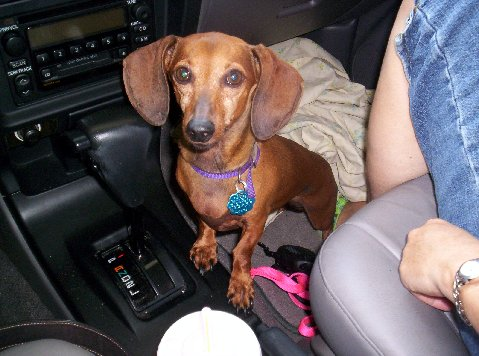

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[0.9986541]]
1
It is a dog


In [101]:
img = "/content/PetImages/Dog/10015.jpg"  # Path to the input image

input_img = cv2.imread(img)
cv2_imshow(input_img)

aug_img = cv2.resize(input_img, (224, 224))
aug_img = np.array(aug_img) / 255.0

# Add an extra batch dimension: (1, 224, 224, 3)
aug_img = np.expand_dims(aug_img, axis=0)

# Make prediction using the trained model
prediction = classifier_model.predict(aug_img)
print(prediction)

predicted_class = 1 if prediction > 0.5 else 0
print(predicted_class)

# Interpret prediction
if predicted_class == 0:
    print("It is a cat")
else:
    print("It is a dog")

